## Import items I'm likely to need and open/inspect dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Original df with State Rank Dummy encoded',index_col="Unnamed: 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21234 entries, 0 to 21409
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21234 non-null  int64  
 1   date             21234 non-null  object 
 2   price            21234 non-null  float64
 3   bedrooms         21234 non-null  int64  
 4   bathrooms        21234 non-null  float64
 5   sqft_living      21234 non-null  int64  
 6   sqft_lot         21234 non-null  int64  
 7   floors           21234 non-null  float64
 8   waterfront       18902 non-null  float64
 9   view             21172 non-null  float64
 10  condition        21234 non-null  int64  
 11  grade            21234 non-null  int64  
 12  sqft_above       21234 non-null  int64  
 13  sqft_basement    21234 non-null  object 
 14  yr_built         21234 non-null  int64  
 15  yr_renovated     17470 non-null  float64
 16  zipcode          21234 non-null  int64  
 17  lat         

In [3]:
df["sqft_basement"] = df["sqft_basement"].replace("0.0", np.nan)
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].fillna(0.0)
df["sqft_basement"] = df["sqft_basement"].map(lambda x: float(x))
# Square feet basement had a lot of issues that I found to clean, I compressed the cleaning of this column to this cell.

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df = df.drop(["waterfront", "lat", "long", "zipcode", "sqft_living15", "sqft_lot15", "grade", "condition", "view", "id"], axis = 1)
# I am interested in creating an inferential statistic so I discarded any column that the home owner would not
# have much if any control over.

In [6]:
df["bathrooms"] = df["bathrooms"]*df["bedrooms"]

In [7]:
df["year_sold"] = df["date"].map(lambda x: x.split("/")[2])
df["date"] = df["date"].map(lambda x: x.split("/")[0])
# The specific date of the sale isn't of interest but the season is.

In [8]:
df = df.drop_duplicates()

In [9]:
df["yr_renovated"] = df["yr_renovated"].fillna(0.0)

In [10]:
df["date"] = df["date"].map(lambda x: int(x))

In [11]:
df["year_sold"] = df["year_sold"].map(lambda x: int(x))

In [12]:
df["yrs_since_built"] = np.abs(df["year_sold"] - df["yr_built"])

In [13]:
df.head()
# Sanity check

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    10  221900.0         3       3.00         1180      5650     1.0   
1    12  538000.0         3       6.75         2570      7242     2.0   
2     2  180000.0         2       2.00          770     10000     1.0   
3    12  604000.0         4      12.00         1960      5000     1.0   
4     2  510000.0         3       6.00         1680      8080     1.0   

   sqft_above  sqft_basement  yr_built  yr_renovated  year_sold  \
0        1180            0.0      1955           0.0       2014   
1        2170          400.0      1951        1991.0       2014   
2         770            0.0      1933           0.0       2015   
3        1050          910.0      1965           0.0       2014   
4        1680            0.0      1987           0.0       2015   

   yrs_since_built  
0               59  
1               63  
2               82  
3               49  
4               28

In [14]:
df["yrs_since_renovated"] = df["year_sold"] - df["yr_renovated"] 
df.head()
# I wanted to see if there was any corelation between how recently "serviced" a house had been with how much it sold for.

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    10  221900.0         3       3.00         1180      5650     1.0   
1    12  538000.0         3       6.75         2570      7242     2.0   
2     2  180000.0         2       2.00          770     10000     1.0   
3    12  604000.0         4      12.00         1960      5000     1.0   
4     2  510000.0         3       6.00         1680      8080     1.0   

   sqft_above  sqft_basement  yr_built  yr_renovated  year_sold  \
0        1180            0.0      1955           0.0       2014   
1        2170          400.0      1951        1991.0       2014   
2         770            0.0      1933           0.0       2015   
3        1050          910.0      1965           0.0       2014   
4        1680            0.0      1987           0.0       2015   

   yrs_since_built  yrs_since_renovated  
0               59               2014.0  
1               63                 23.0  
2               82               2015.0  
3               49               2014.0  
4               28               2015.0

In [15]:
df["year_sold"].iloc[0]
# making sure code works the way I want it to

2014

In [16]:
while df["yrs_since_renovated"].loc[df["yrs_since_renovated"]==0].count() > 0:
    for i in range(0, len(df)):
        if df["year_sold"].iloc[i] == df["yrs_since_renovated"].iloc[i]:
            df["yrs_since_renovated"].iloc[i] = df["yrs_since_built"].iloc[i]
        elif df["yrs_since_renovated"].iloc[i] == 0.0:
            df["yrs_since_renovated"].iloc[i] = 0.1
# Python tried to fend off my assault of odd code, but it made the fatal error of telling me that the code works just
# not every time. So I just had to leverage the coding equivalent of a sledgehammer also known as a while statement.

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    10  221900.0         3       3.00         1180      5650     1.0   
1    12  538000.0         3       6.75         2570      7242     2.0   
2     2  180000.0         2       2.00          770     10000     1.0   
3    12  604000.0         4      12.00         1960      5000     1.0   
4     2  510000.0         3       6.00         1680      8080     1.0   

   sqft_above  sqft_basement  yr_built  yr_renovated  year_sold  \
0        1180            0.0      1955           0.0       2014   
1        2170          400.0      1951        1991.0       2014   
2         770            0.0      1933           0.0       2015   
3        1050          910.0      1965           0.0       2014   
4        1680            0.0      1987           0.0       2015   

   yrs_since_built  yrs_since_renovated  
0               59                 59.0  
1               63                 23.0  
2               82                 82.0  
3               49                 49.0  
4               28                 28.0

In [18]:
df["sqft_living_per_bathroom"] = df["sqft_living"]/df["bathrooms"]
# This was added later after I found too strong a correlation between these variables.

In [19]:
df["sqft_living_per_bedroom"] = df["sqft_living"]/df["bedrooms"]

In [20]:
# df['recent'] = df['yr_renovated']
# df.loc[df['recent'] == 0, 'recent'] = df.loc[df['recent'] == 0, 'yr_built']
# df['recent']
df.loc[df["yrs_since_renovated"] == 0]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, yr_built, yr_renovated, year_sold, yrs_since_built, yrs_since_renovated, sqft_living_per_bathroom, sqft_living_per_bedroom]
Index: []

In [21]:
df = df.drop(["yr_renovated", "yr_built", "year_sold", "yrs_since_built", "sqft_lot"], axis = 1)
df.head()
# I no longer need these plebian columns, I have found what I wanted.

date     price  bedrooms  bathrooms  sqft_living  floors  sqft_above  \
0    10  221900.0         3       3.00         1180     1.0        1180   
1    12  538000.0         3       6.75         2570     2.0        2170   
2     2  180000.0         2       2.00          770     1.0         770   
3    12  604000.0         4      12.00         1960     1.0        1050   
4     2  510000.0         3       6.00         1680     1.0        1680   

   sqft_basement  yrs_since_renovated  sqft_living_per_bathroom  \
0            0.0                 59.0                393.333333   
1          400.0                 23.0                380.740741   
2            0.0                 82.0                385.000000   
3          910.0                 49.0                163.333333   
4            0.0                 28.0                280.000000   

   sqft_living_per_bedroom  
0               393.333333  
1               856.666667  
2               385.000000  
3               490.000000  
4               560.000000

In [22]:
for i in range(0, len(df)):
    if df["date"].iloc[i] == 1:
        df["date"].iloc[i] = 4
    elif df["date"].iloc[i] == 2:
        df["date"].iloc[i] = 4
    elif df["date"].iloc[i] == 3:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 4:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 5:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 6:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 7:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 8:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 9:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 10:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 11:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 12:
        df["date"].iloc[i] = 4
        
    
    
# Making the season list, 2:summer = 6-8, 3:fall = 9-11, 4:winter = 12-2, 1:spring 3-5

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
df.loc[df["date"] > 4]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, floors, sqft_above, sqft_basement, yrs_since_renovated, sqft_living_per_bathroom, sqft_living_per_bedroom]
Index: []

In [24]:
while df["sqft_basement"].loc[df["sqft_basement"] == 0].count() > 0:
    for i in range(0, len(df)):
        if df["sqft_basement"].iloc[i] == 0:
            df["sqft_basement"].iloc[i] = 0.1
# Here I am, back on my sus code game.

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Checking for Outliers

In [25]:
df.describe()

date         price      bedrooms     bathrooms   sqft_living  \
count  21595.000000  2.159500e+04  21595.000000  21595.000000  21595.000000   
mean       2.274601  5.403101e+05      3.373281      7.503774   2080.399676   
std        1.070014  3.673802e+05      0.926291      4.224436    918.111563   
min        1.000000  7.800000e+04      1.000000      0.500000    370.000000   
25%        1.000000  3.220000e+05      3.000000      4.500000   1430.000000   
50%        2.000000  4.500000e+05      3.000000      7.000000   1910.000000   
75%        3.000000  6.450000e+05      4.000000     10.000000   2550.000000   
max        4.000000  7.700000e+06     33.000000     67.500000  13540.000000   

             floors    sqft_above  sqft_basement  yrs_since_renovated  \
count  21595.000000  21595.000000   21595.000000         21595.000000   
mean       1.494003   1788.663857     285.788326            41.384709   
std        0.539599    827.762140     439.795735            28.945082   
min        1.000000    370.000000       0.100000            -1.000000   
25%        1.000000   1190.000000       0.100000            16.000000   
50%        1.500000   1560.000000       0.100000            37.000000   
75%        2.000000   2210.000000     550.000000            61.000000   
max        3.500000   9410.000000    4820.000000           115.000000   

       sqft_living_per_bathroom  sqft_living_per_bedroom  
count              21595.000000             21595.000000  
mean                 317.749247               618.158633  
std                  129.883970               215.905935  
min                   28.051948                49.090909  
25%                  233.846154               470.000000  
50%                  288.888889               576.666667  
75%                  367.000000               722.500000  
max                 2880.000000              3420.000000

In [26]:
# checking for outliers as later the bedroom coefficent wasn't making sense and I was desperately searching for a solution.
price_range = (322000 - (645000 - 322000)*1.5, 645000 + (645000 - 322000)*1.5)
bedroom_range = (3 - (4 - 3)*1.5, (4 - 3)*1.5 + 4)
bathroom_range = (1.75 - (2.5 - 1.75)*1.5, 2.5 + (2.5 - 1.75)*1.5)
sqft_living_range = (1430 - (2550 - 1430)*1.5, 2550 + (2550 - 1430)*1.5)
floors_range = (1 - (2 - 1)*1.5, 2 + (2 - 1)*1.5)
sqft_above_range = (1190 - (2210 - 1190)*1.5, 2210 + (2210 - 1190)*1.5)
yrs_since_range = (16 - (61 - 16)*1.5, 61 + (61 - 16)*1.5)
sqft_living_bathroom_range = (800 - (1165.934066 - 800)*1.5, 1165.934066 + (1165.934066 - 800)*1.5)
sqft_living_bedroom_range = (470 - (722.5 - 470)*1.5, 722.5 + (722.5 - 470)*1.5)

print("price lower and upper limit:", (322000 - (645000 - 322000)*1.5, 645000 + (645000 - 322000)*1.5))
print("bedroom lower and upper limit:", (3 - (4 - 3)*1.5, (4 - 3)*1.5 + 4))
print("bathrooms lower and upper limit:", (1.75 - (2.5 - 1.75)*1.5, 2.5 + (2.5 - 1.75)*1.5))
print("sqft_living lower and upper limit:", (1430 - (2550 - 1430)*1.5, 2550 + (2550 - 1430)*1.5))
print("floors lower and upper limit:", (1 - (2 - 1)*1.5, 2 + (2 - 1)*1.5))
print("sqft_above lower and upper limit:", (1190 - (2210 - 1190)*1.5, 2210 + (2210 - 1190)*1.5))
print("yrs_since_renovated lower and upper limit:", (16 - (61 - 16)*1.5, 61 + (61 - 16)*1.5))
print("sqft_living_per_bathroom lower and upper limit:", (800 - (1165.934066 - 800)*1.5, 1165.934066 + (1165.934066 - 800)*1.5))
print("sqft_living_per_bedroom lower and upper limit:", (470 - (722.5 - 470)*1.5, 722.5 + (722.5 - 470)*1.5))

price lower and upper limit: (-162500.0, 1129500.0)
bedroom lower and upper limit: (1.5, 5.5)
bathrooms lower and upper limit: (0.625, 3.625)
sqft_living lower and upper limit: (-250.0, 4230.0)
floors lower and upper limit: (-0.5, 3.5)
sqft_above lower and upper limit: (-340.0, 3740.0)
yrs_since_renovated lower and upper limit: (-51.5, 128.5)
sqft_living_per_bathroom lower and upper limit: (251.09890099999996, 1714.835165)
sqft_living_per_bedroom lower and upper limit: (91.25, 1101.25)


<AxesSubplot:>

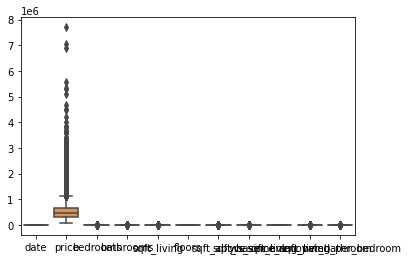

In [27]:
sns.boxplot(data = df)

In [28]:
continuous = ["sqft_above", "yrs_since_renovated", "price", "sqft_living_per_bathroom", "sqft_basement"]

categorical = ['bedrooms', 'floors', 'date']

df_log = np.log(df[continuous])
df_log.columns = [f"{column}_log" for column in df[continuous]]

    
df_norm = (np.log(df[continuous]) - np.mean(np.log(df[continuous])))/np.std(np.log(df[continuous]))
df_norm.columns = [f"{column}_log" for column in df[continuous]]

df_ohe = pd.get_dummies(df[categorical], drop_first = True)

df_final = pd.concat([df_norm, df_ohe], axis = 1)
# Gotta make sure that if the data looks normal so time to standardize and normalize for some big lad graphs!

<ipython-input-28-b04533becd60>:5: RuntimeWarning: invalid value encountered in log
  df_log = np.log(df[continuous])
<ipython-input-28-b04533becd60>:9: RuntimeWarning: invalid value encountered in log
  df_norm = (np.log(df[continuous]) - np.mean(np.log(df[continuous])))/np.std(np.log(df[continuous]))


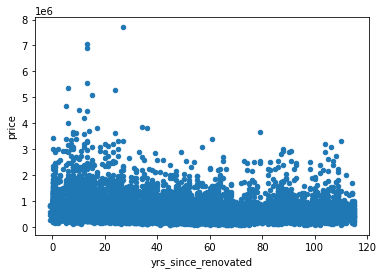

In [29]:
df.plot(kind = "scatter", x = "yrs_since_renovated", y = "price");

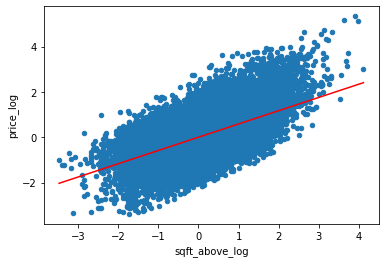

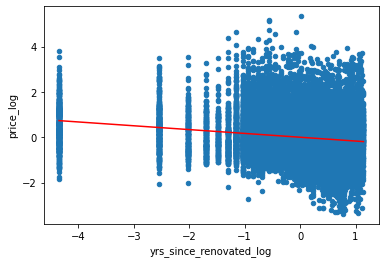

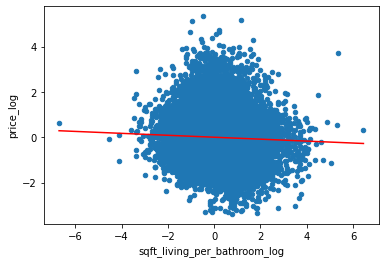

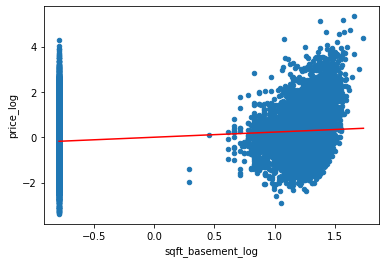

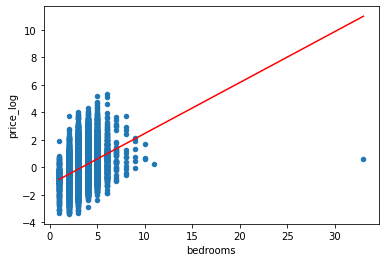

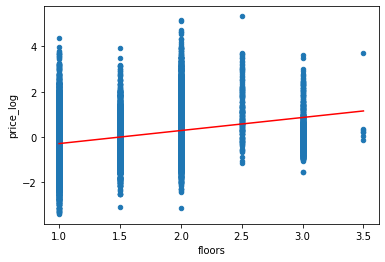

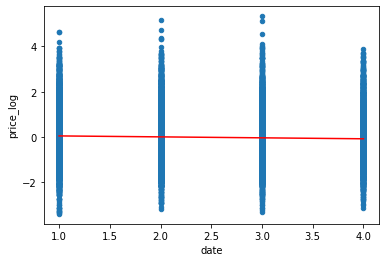

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in df_final.drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {col}", data = df_final).fit()
    df_predict = pd.DataFrame({f"{col}": [df_final[col].min(), df_final[col].max()]})
    df_final.plot(kind = "scatter", x = f"{col}", y = "price_log")
    plt.plot(df_predict, model.predict(df_predict), color = "red")
    
# Prediction line graphs

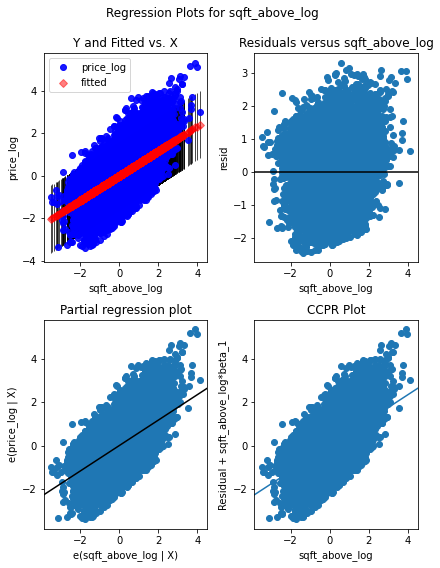

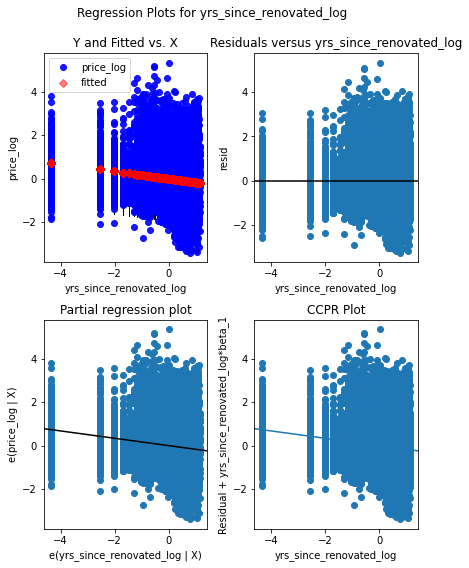

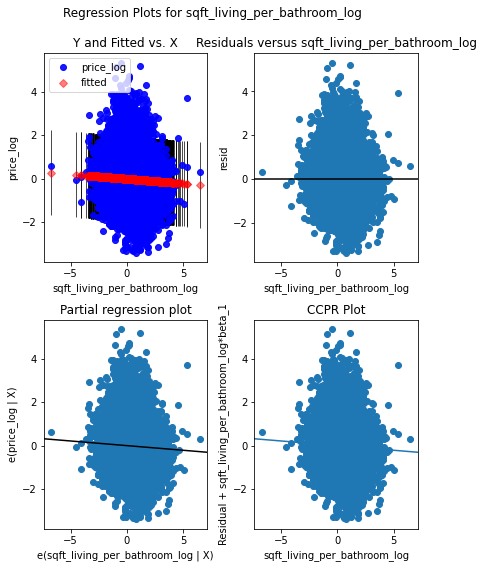

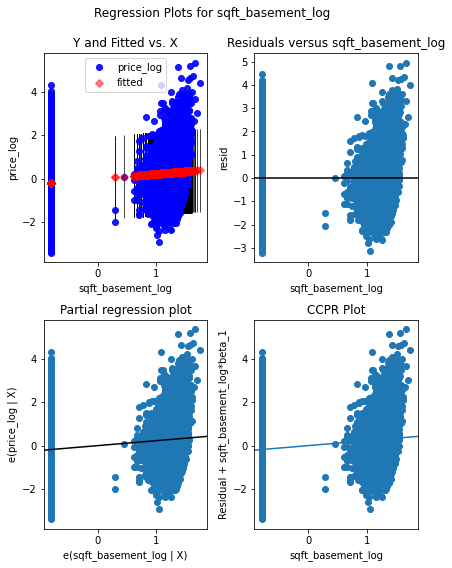

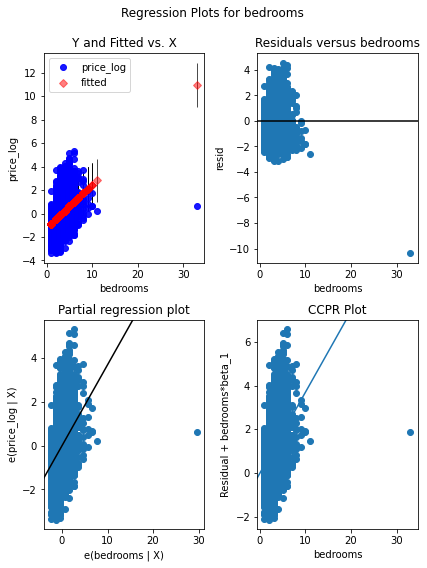

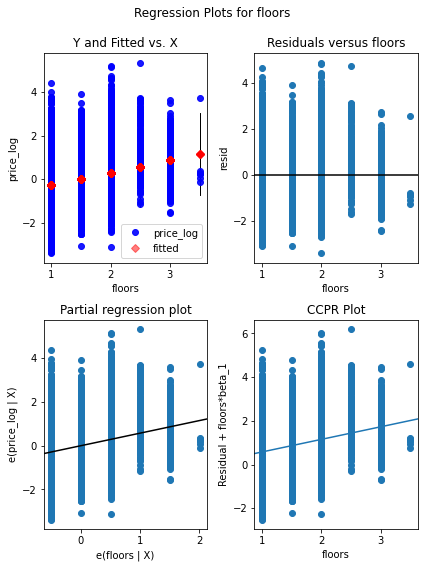

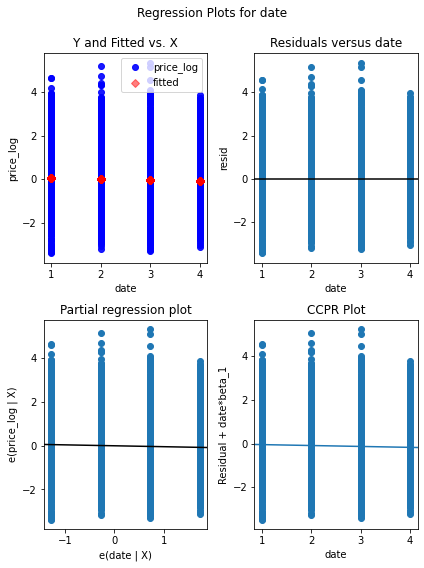

In [31]:
for col in df_final.drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {col}", data = df_final).fit()
    
    fig = plt.figure(figsize = (6,8))
    fig = sm.graphics.plot_regress_exog(model, f"{col}", fig = fig);
    
# Examining error and heteroscadasity graphs

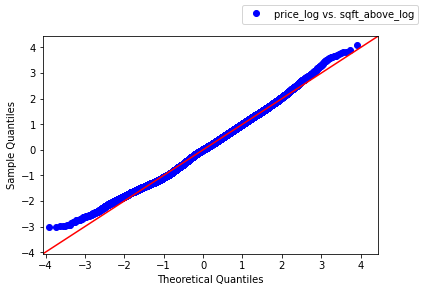

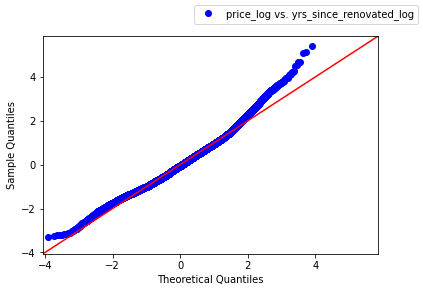

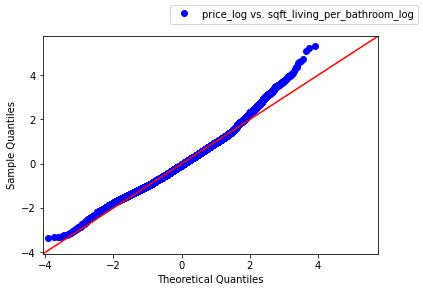

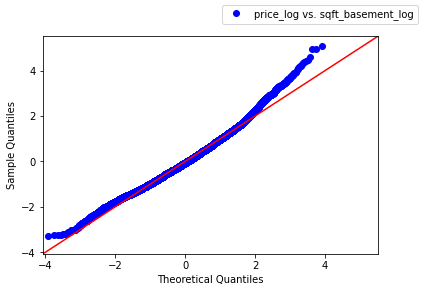

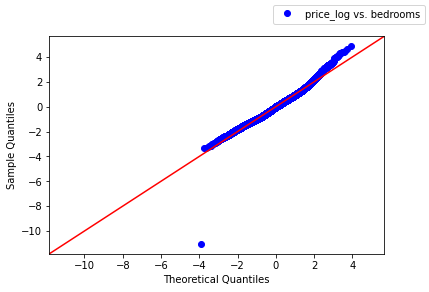

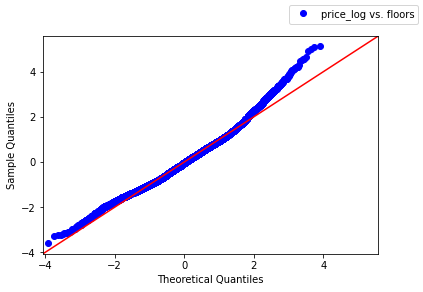

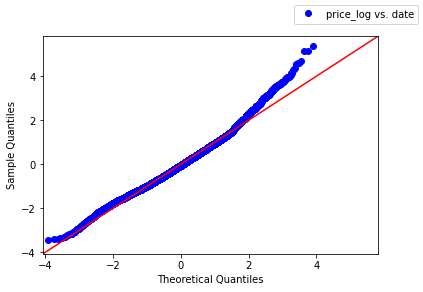

In [32]:
import scipy.stats as stats

for predictor in df_final.drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {predictor}", data = df_final).fit()
    
    fig = sm.graphics.qqplot(model.resid, dist = stats.norm, fit = True, line = "45", label = f"price_log vs. {predictor}")
    fig.legend();
    
    # QQ plot graphs to check for normal shapes

In [33]:
df_final_corr = df_final.corr().abs().stack().reset_index()
df_final_corr["pairs"] = df_final_corr["level_0"] + " & " + df_final_corr["level_1"]
df_final_corr = df_final_corr.drop(["level_0", "level_1"], axis = 1).set_index("pairs")
df_final_corr.columns = ["cc"]
# As sqft_above, bathrooms, and sqft_living are all strongly correlated we need to drop sqft_above and combine the bathrooms and sqft_living

In [51]:
df_model = pd.concat([df_ohe, df[["sqft_above", "yrs_since_renovated", "price", "sqft_living_per_bathroom", "sqft_basement", "sqft_living_per_bedroom"]]], axis = 1)
df_model
# Makin a model to look at the numbers

bedrooms  floors  date  sqft_above  yrs_since_renovated     price  \
0             3     1.0     3        1180                 59.0  221900.0   
1             3     2.0     4        2170                 23.0  538000.0   
2             2     1.0     4         770                 82.0  180000.0   
3             4     1.0     4        1050                 49.0  604000.0   
4             3     1.0     4        1680                 28.0  510000.0   
...         ...     ...   ...         ...                  ...       ...   
21592         3     3.0     1        1530                  5.0  360000.0   
21593         4     2.0     4        2310                  1.0  400000.0   
21594         2     2.0     2        1020                  5.0  402101.0   
21595         3     2.0     4        1600                 11.0  400000.0   
21596         2     2.0     3        1020                  6.0  325000.0   

       sqft_living_per_bathroom  sqft_basement  sqft_living_per_bedroom  
0                    393.333333            0.1               393.333333  
1                    380.740741          400.0               856.666667  
2                    385.000000            0.1               385.000000  
3                    163.333333          910.0               490.000000  
4                    280.000000            0.1               560.000000  
...                         ...            ...                      ...  
21592                204.000000            0.1               510.000000  
21593                231.000000            0.1               577.500000  
21594                680.000000            0.1               510.000000  
21595                213.333333            0.1               533.333333  
21596                680.000000            0.1               510.000000  

[21595 rows x 9 columns]

In [52]:
df_model.corr()
# You can't have any non price variables have above a 0.7 correlation with one another. So here I am, covering my bases


bedrooms    floors      date  sqft_above  \
bedrooms                  1.000000  0.178106 -0.000727    0.479336   
floors                    0.178106  1.000000 -0.001920    0.524232   
date                     -0.000727 -0.001920  1.000000    0.000313   
sqft_above                0.479336  0.524232  0.000313    1.000000   
yrs_since_renovated      -0.164652 -0.500845  0.001019   -0.433903   
price                     0.308756  0.256895 -0.033010    0.605356   
sqft_living_per_bathroom -0.549677 -0.249882  0.004262   -0.133443   
sqft_basement             0.297256 -0.241833 -0.003814   -0.051165   
sqft_living_per_bedroom  -0.024117  0.290822  0.000248    0.671150   

                          yrs_since_renovated     price  \
bedrooms                            -0.164652  0.308756   
floors                              -0.500845  0.256895   
date                                 0.001019 -0.033010   
sqft_above                          -0.433903  0.605356   
yrs_since_renovated                  1.000000 -0.097507   
price                               -0.097507  1.000000   
sqft_living_per_bathroom             0.329651 -0.025004   
sqft_basement                        0.104889  0.321129   
sqft_living_per_bedroom             -0.280867  0.580110   

                          sqft_living_per_bathroom  sqft_basement  \
bedrooms                                 -0.549677       0.297256   
floors                                   -0.249882      -0.241833   
date                                      0.004262      -0.003814   
sqft_above                               -0.133443      -0.051165   
yrs_since_renovated                       0.329651       0.104889   
price                                    -0.025004       0.321129   
sqft_living_per_bathroom                  1.000000      -0.003428   
sqft_basement                            -0.003428       1.000000   
sqft_living_per_bedroom                   0.343391       0.306910   

                          sqft_living_per_bedroom  
bedrooms                                -0.024117  
floors                                   0.290822  
date                                     0.000248  
sqft_above                               0.671150  
yrs_since_renovated                     -0.280867  
price                                    0.580110  
sqft_living_per_bathroom                 0.343391  
sqft_basement                            0.306910  
sqft_living_per_bedroom                  1.000000

In [54]:
predictors = "+".join(df_model.drop(["price", "bedrooms"], axis = 1))
f = "price ~" + predictors
model = ols(formula = f, data = df_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3485.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:49:47   Log-Likelihood:            -2.9920e+05
No. Observations:               21595   AIC:                         5.984e+05
Df Residuals:                   21587   BIC:                         5.985e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.688e+05   1.01e+04    -26.711      0.000   -2.89e+05   -2.49e+05
floors                     5.61e+04   4192.799     13.379      0.000    4.79e+04    6.43e+04
date                     -1.095e+04   1601.234     -6.838      0.000   -1.41e+04   -7810.463
sqft_above                 231.3157      3.840     60.244      0.000     223.790     238.842
yrs_since_renovated       2889.8261     75.728     38.161      0.000    2741.393    3038.259
sqft_living_per_bathroom  -232.0161     20.373    -11.388      0.000    -271.948    -192.084
sqft_basement              232.2408      5.193     44.724      0.000     222.063     242.419
sqft_living_per_bedroom    362.6907     17.431     20.808      0.000     328.526     396.856
==============================================================================
Omnibus:                    15333.878   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           673247.004
Skew:                           2.913   Prob(JB):                         0.00
Kurtosis:                      29.726   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
df_no_outliers = df[(df["price"] <= price_range[1]) & (df["price"] >= price_range[0]) &
                    (df["bedrooms"] <= bedroom_range[1]) & (df["bedrooms"] >= bedroom_range[0]) &
                    (df["sqft_living_per_bathroom"] <= sqft_living_bathroom_range[1]) & (df["sqft_living_per_bathroom"] >= sqft_living_bathroom_range[0]) &
                    (df["sqft_living_per_bedroom"] <= sqft_living_bedroom_range[1]) & (df["sqft_living_per_bedroom"] >= sqft_living_bedroom_range[0]) &
                    (df["yrs_since_renovated"] <= yrs_since_range[1]) & (df["yrs_since_renovated"] >= yrs_since_range[0]) &
                    (df["sqft_above"] <= sqft_above_range[1]) & (df["sqft_above"] >= sqft_above_range[0]) &
                    (df["floors"] <= floors_range[1]) & (df["floors"] >= floors_range[0]) &
                    (df["sqft_living"] <= sqft_living_range[1]) & (df["sqft_living"] >= sqft_living_range[0]) &
                    (df["bathrooms"] <= bathroom_range[1]) & (df["bathrooms"] >= bathroom_range[0])]    



In [48]:
while df_no_outliers["sqft_basement"].loc[df_no_outliers["sqft_basement"] == 0.1].count() > 0:
    for i in range(0, len(df_no_outliers)):
        if df_no_outliers["sqft_basement"].iloc[i] == 0.1:
            df_no_outliers["sqft_basement"].iloc[i] = 0
df_no_outliers

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-48-3fc4828bda76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["sqft_basement"].iloc[i] = 0


date     price  bedrooms  bathrooms  sqft_living  floors  sqft_above  \
0         3  221900.0         3        3.0         1180     1.0        1180   
2         4  180000.0         2        2.0          770     1.0         770   
8         1  229500.0         3        3.0         1780     1.0        1050   
11        1  468000.0         2        2.0         1160     1.0         860   
12        1  310000.0         3        3.0         1430     1.5        1430   
...     ...       ...       ...        ...          ...     ...         ...   
21562     2  362500.0         2        3.0          940     2.0         940   
21567     2  399950.0         2        2.0          710     2.0         710   
21572     3  414500.0         2        3.0         1210     2.0        1020   
21594     2  402101.0         2        1.5         1020     2.0        1020   
21596     3  325000.0         2        1.5         1020     2.0        1020   

       sqft_basement  yrs_since_renovated  sqft_living_per_bathroom  \
0                0.0                 59.0                393.333333   
2                0.0                 82.0                385.000000   
8              730.0                 55.0                593.333333   
11             300.0                 72.0                580.000000   
12               0.0                 87.0                476.666667   
...              ...                  ...                       ...   
21562            0.0                  5.0                313.333333   
21567            0.0                 71.0                355.000000   
21572          190.0                  7.0                403.333333   
21594            0.0                  5.0                680.000000   
21596            0.0                  6.0                680.000000   

       sqft_living_per_bedroom  
0                   393.333333  
2                   385.000000  
8                   593.333333  
11                  580.000000  
12                  476.666667  
...                        ...  
21562               470.000000  
21567               355.000000  
21572               605.000000  
21594               510.000000  
21596               510.000000  

[3936 rows x 11 columns]

In [49]:
df_no_outliers = df_no_outliers.drop(["sqft_living_per_bathroom", "sqft_living_per_bedroom", "sqft_above", "sqft_basement"], axis = 1)

In [50]:
predictors = "+".join(df_no_outliers.drop("price", axis = 1))
f = "price ~" + predictors
model = ols(formula = f, data = df_no_outliers).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          3.86e-215
Time:                        16:40:18   Log-Likelihood:                -52056.
No. Observations:                3936   AIC:                         1.041e+05
Df Residuals:                    3929   BIC:                         1.042e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.961e+04   1.76e+04      4.523      0.000    4.51e+04    1.14e+05
date                -5465.3766   1960.080     -2.788      0.005   -9308.247   -1622.507
bedrooms            -7.127e+04   5735.486    -12.425      0.000   -8.25e+04      -6e+04
bathrooms            3.649e+04   5950.111      6.132      0.000    2.48e+04    4.82e+04
sqft_living           166.9613      7.450     22.410      0.000     152.354     181.568
floors               5.389e+04   6675.980      8.072      0.000    4.08e+04     6.7e+04
yrs_since_renovated  1654.0223     93.761     17.641      0.000    1470.197    1837.848
==============================================================================
Omnibus:                      488.684   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.293
Skew:                           0.827   Prob(JB):                    1.89e-186
Kurtosis:                       4.575   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""